![header](../header.png)

# Assignment 01 - Statistics (15 points total)
<span style='color:red'> Due date: 18.05.2021 23:59</span>

This week's assignment is about basic statistics. If anything is unlcear or if you find errors, feel free to post in the forum set up in Ilias or in the WebEx live session, or write an email to one of us.

_You can submit incomplete assignments that don't validate_. If a test cell validates correctly, you will get the points.

**This assignment is optional**, but the points you get here will count towards the 80% necessary to pass.

---

## Expectation Value of Die Throws (8 points)
Consider an unbiased 6-sided die $D_1$. Below, create a function called `compile_solution_space` that, given the number of `sides` of a die, returns a list of all the results a single die throw can yield. Make it as general as possible, such that when you consider a 10-sided die it would give the correct list. It should look like `[1, 2, 3, ...]`.

In [2]:
D_1_sides = 6

def compile_single_solution_space(sides):
    ### BEGIN SOLUTION
    return [eyes+1 for eyes in range(sides)]
    ### END SOLUTION
    
print(compile_single_solution_space(D_1_sides))

[1, 2, 3, 4, 5, 6]


In [3]:
assert compile_single_solution_space(-2) == []


Next, we need the sample space of two dice. There are multiple ways to do this, but let's use the following way:

Create a function `compile_double_solution_space` that takes as input two single die throw solution spaces `space1` and `space2`, each created by the function from before and named `D_1` and `D_2`. The function should return a list of lists, where each inner list contains two values, giving the result of the double die throw. It should look like this: `[[1, 1], [1, 2], ...]` and have 36 elements in total.

In [4]:
D_1 = compile_single_solution_space(D_1_sides)
D_2 = compile_single_solution_space(D_1_sides)

def compile_double_solution_space(space1, space2):
    ### BEGIN SOLUTION
    return [[state1, state2] for state1 in space1 for state2 in space2]
    ### END SOLUTION

D_1_2 = compile_double_solution_space(D_1, D_2)
print(D_1_2)

[[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6]]


In [5]:
from itertools import product
combs1 = compile_double_solution_space([i+1 for i in range(11)], [i+1 for i in range(11)])
combs2 = [[i, j] for (i, j) in product([i+1 for i in range(11)], repeat=2)]
assert combs1 == combs2

The sample space created above contains all results, respecting the order in which they occured. What we did now was to simply combine the sample spaces of two independent random variables that were uniformly distributed, so each result in this new sample space should still follow a uniform distribution.

To calculate the expectation value, we need the corresponding probabilites. In the code below, create a function called `pmf_uniform` that returns a list of probabilities for a given list of states, assuming they follow a uniform distribution:

In [9]:
def pmf_uniform(sample_space):
    ### BEGIN SOLUTION
    return len(sample_space) * [1/len(sample_space)]
    ### END SOLUTION
    
prob_D_1   = pmf_uniform(D_1)
prob_D_2   = pmf_uniform(D_2)
prob_D_1_2 = pmf_uniform(D_1_2)

print(prob_D_1)
print(prob_D_2)
print(prob_D_1_2)

[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
[0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.02777777777777777

Before we can calculate the expectation value for the double die throw, we need to get a list of the sum of each result. Below, create a function called `double_die_sums` that takes as input the state space of two dice `D_1_2` and outputs a list of the corresponding sums. It should look like `[2, 3, ...]`, where numbers need not be unique.

In [12]:
def double_die_sums(sample_space):
    ### BEGIN SOLUTION
    return [sum(state) for state in sample_space]
    ### END SOLUTION
    
sums_D_1_2 = double_die_sums(D_1_2)
print(sums_D_1_2)

[2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12]


Now we can calculate the expectation value of each sample space. Create a function below called `expectation`, that takes as input a sample space of only numbers and a corresponding probability list, then returns the expectation value. The sample space of the double die throw is the list of the sums `sums_D_1_2` created above.

In [14]:
def expectation(sample_space, probs):
    ### BEGIN SOLUTION
    return sum([s * p / len(sample_space) for s in sample_space for p in probs])
    ### END SOLUTION

E_D_1   = expectation(D_1, prob_D_1)
E_D_2   = expectation(D_2, prob_D_2)
E_D_1_2 = expectation(sums_D_1_2, prob_D_1_2)

print("E[D_1]   = ", E_D_1)
print("E[D_2]   = ", E_D_2)
print("E[D_1_2] = ", E_D_1_2)

E[D_1]   =  3.4999999999999996
E[D_2]   =  3.4999999999999996
E[D_1_2] =  6.999999999999963


In [15]:
from numpy import isclose
n = 10
assert isclose(expectation([x**2 for x in range(n)], n*[1/n])*n, sum([x**2 for x in range(n)]))

Let's plot the possible sums and their occurence as a distribution:

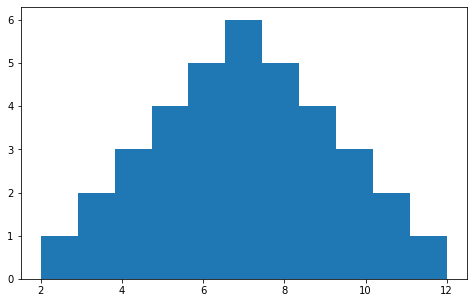

In [16]:
import matplotlib.pyplot as plt


plt.figure(figsize=([8,5]))
plt.hist(sums_D_1_2, bins=len(set(sums_D_1_2)), density=False)
plt.show()

Note how a higher occurence of a sum directly implies such a sum is more likely to be drawn from a random throw. The number of times a sum occurs is proportional to the number of different states that can build the specific sum. In other words, the probability to get a certain sum is proportional to the "volume" of the space belonging to that sum. 

Recall the notion of **entropy**, which is (roughly speaking) the volume of the configuration space of a system that corresponds to a fixed **energy** of the system. According to the second law of thermodynamics, all systems tend to maximize entropy. This is an explanation for why this is true. The larger the configuration space (number of ways a sum can be built) belonging to a certain energy (sum of two dice), the higher the probability to find the system in such a state.

We will come back to the concept of entropy later in the course.

---

## Central Limit Theorem (4 points)
We can generalize the last exercise to an arbitrary number of dice and also to arbitrary dice using the `product` function from `itertools`. `product`takes a list (or tuple) of values and creates all subsets (with repetitions) that can be built using `repeat` number of entries from the list.

Using more dice has an interesting corollary with strong statistical implications, which we can visualize below.

What you need to complete in the next cell is to compute the *mean* and *average* of the array `sums`. Feel free to set `print` statements to see how different variables look like.

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from numpy import linspace, sqrt
import scipy.stats as stats
import matplotlib.pyplot as plt
from itertools import product

def plot_n_die_space(sides, n_dice, plot_gauss):
    combs = product([i+1 for i in range(sides)], repeat=n_dice)
    sums = [sum(tup) for tup in combs]
    
    plt.figure(figsize=([8,5]))
    plt.hist(sums, bins=len(set(sums)), density=True)
    if plot_gauss:
        # calculate the mean of the list "sums" in the variable "mean" here
        # then the variance of "sums" in a variable called "variance"
        ### BEGIN SOLUTION
        mean = sum(sums)/len(sums)
        variance = sum((val - mean) ** 2 for val in sums) / len(sums)
        ### END SOLUTION
        samples = 100
        x = linspace(min(sums), max(sums), samples)
        plt.plot(x, stats.norm.pdf(x, loc=mean, scale=sqrt(variance)), color="darkorange", lw=2.5)
    plt.show()
    
interact(plot_n_die_space, 
         sides=widgets.IntSlider(min=2, max=10, value=6, continuous_update=False), \
         n_dice=widgets.IntSlider(min=1, max=8, value=3, continuous_update=False), \
         plot_gauss=widgets.ToggleButton(value=False, description="Plot Gauss curve"))

interactive(children=(IntSlider(value=6, continuous_update=False, description='sides', max=10, min=2), IntSlid…

<function __main__.plot_n_die_space(sides, n_dice, plot_gauss)>

<font color='red'>Please don't increase the values here beyond the ones given by the sliders, this is a very inefficient way of doing things and might take a long time to complete.</font>

Note how using more dice gets the distribution closer and closer to a **Bell curve/Gaussian distribution** (actually, we would have to randomly draw samples from the sample space, but the result would be the same). This is called the **Central Limit Theorem** and occurs when adding sufficiently many random variables of *arbitrary* distribution.

One of the implications is the following:<br />
Suppose 10 different manufacturers each sent you 100 samples of some material each and you would like to calculate the mean yield strength of all samples you received, plus the variance. The naive way would be to do a tensile test on all 1000 samples, add their yield strengths and divide by 1000. This is obviously not practical. Instead, you could do the following:

[1] Draw groups of specimen at random. Each group is a **sample**. Draw multiple samples, each consisting of, say, 10 specimen. <br />
[2] Calculate the mean of each of these samples.<br /> 
[3] Calculate the mean of these means. <br />

This will give you an approximate mean of the yield strength of *all* the specimen you received from the companies. The variance can be calculated from the samples using $V_\mathrm{sample} = \frac{V_\mathrm{full}}{\sqrt{\mathrm{samplesize}}}$.

The criteria to be able to use this are:

[1] The data must be sampled randomly.<br />
[2] Samples must be independent of each other.<br />
[3] Sample size should be less than $\sim 10\%$ of the full number of specimen<br />
[4] Sample size must still be sufficiently large (depending on the full specimen distribution).<br />

---

## Bayes' Theorem (3 points)
You can ask the inverse question to the question from the lecture. Instead of calculating how well a test works by calculating $P(d|+)$, we can assume a certain probability we desire and set a requirement for the accuracy of a test. Suppose there is a test again, and some machinery that is either defective or functional. The state spaces accordingly are $T = \{+,-\}$ (positive and negative test result) and $S = \{d, f\}$ (defective and functional). Given is a base probability of a machine being defective of $P(d) = 0.04$ and a desired test performance of $P(d|+) = 0.95$.

Use either the cell below or your own method to calculate the necessary test accuracy $P(+|d)$. Save your result in the variable `p_p_given_d` below with 5 digits after the comma (as in `p_p_given_d = 0.12345`). Recall the rule of complements, such as in $P(+|f) = 1 - P(+|d)$ (assuming the probabilities for true positives and true negatives are the same).

In [17]:
# save your result in a variable called "p_p_given_d"
### BEGIN SOLUTION
p_d_given_p = 0.95
p_d = 0.04

p_p_given_d = p_d_given_p * (1 - p_d) / (p_d - p_d_given_p * p_d + p_d_given_p * (1 - p_d))
#p_p_given_d = 0.99781
# put the following in a markdown cell to get formula:
#\begin{equation}
#  P(d|+) = \frac{P(+|d)\cdot P(d)}{P(+|d)\cdot P(d) + P(+|f)\cdot P(f)}
#\end{equation}
#
#with $P(+|f) = 1 - P(+|d)$ and $P(f) = 1 - P(d)$:
#
#\begin{equation}
#  P(+|d) = \frac{P(d|+)\cdot P(f)}{P(d) - P(d|+)\cdot P(d) + P(d|+)\cdot P(f)}
#\end{equation}
### END SOLUTION

\begin{equation}
  P(d|+) = \frac{P(+|d)\cdot P(d)}{P(+|d)\cdot P(d) + P(+|f)\cdot P(f)}
\end{equation}

with $P(+|f) = 1 - P(+|d)$ and $P(f) = 1 - P(d)$:

\begin{equation}
  P(+|d) = \frac{P(d|+)\cdot P(f)}{P(d) - P(d|+)\cdot P(d) + P(d|+)\cdot P(f)}
\end{equation}